# Лабораторная работа 1

# Сычева Дарья, группа РИМ-181226
### Раздел курса на stepik - 2. Устройство изображения. Работа с изображением в Python.

#### 2.1.1 Предположим, что вы хотите хранить цветные изображения с указанием прозрачности каждого пикселя. Для каждого пикселя потребуется хранить четыре числа: три цветных компоненты (R, G и B) со значениями в диапазоне [0..31] каждая и компоненту прозрачности — число в диапазоне [0..63]. Сколько бит потребуется для хранения значений одного пикселя?

In [1]:
5 * 3 + 6

21

#### 2.1.2 Прочитайте изображение из файла img.png и выведите количество столбцов этого изображения на стандартный вывод.

In [2]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import roll

In [3]:
img = imread('https://stepik.org/media/attachments/lesson/58180/img.png')
img.shape[1]

419

#### 2.1.3 Изменение цвета пикселя изображения
#### Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Поменяйте цвет центрального пикселя этого изображения на зеленый цвет rgb (102, 204, 102) и сохраните изображение в файл out_img.png.

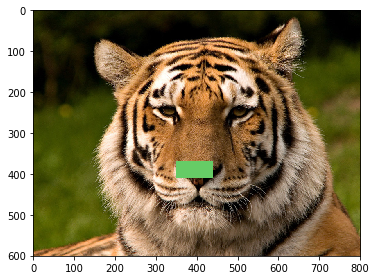

In [4]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-color.png')
img_assigned = img
img_copy = img.copy()
img[370:410, 350:440] = [102, 204, 102]
imshow(img)

#### 2.1.4 Изменение цвета прямоугольникаЗагрузите изображение из файла img.png. Оно имеет нечетное количество строк и столбцов. В центре этого изображения находится прямоугольник размером 7 строк и 15 столбцов. Поменяйте его цвет на розовый rgb(255, 192, 203) и сохраните в файл out_img.png.

In [5]:
img_1 = imread('https://stepik.org/media/attachments/lesson/58180/tiger-gray.png')
img_2 = imread('https://stepik.org/media/attachments/lesson/58180/tiger-pink.png')

center_gor = img_1.shape[0]//2
center_vert = img_1.shape[1]//2
img_1[center_gor - 3: center_gor + 4, center_vert - 7:center_vert + 8] = [255, 192, 203]

np.array_equal(img_1, img_2)

True

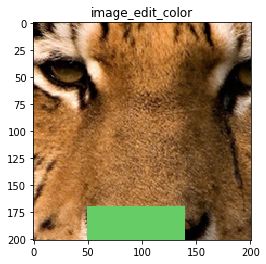

In [6]:
plt.title("image_edit_color")
plt.imshow(img[center_gor - 100: center_gor + 101, center_vert - 100:center_vert + 101])
plt.show()

#### 2.1.5 Определение рамки изображения

#### Загрузите изображение из файла img.png. Изображение состоит из рамки сплошного цвета и внутренней части изображения. Цвет рамки можно узнать, посмотрев на левый верхний пиксель. Рамка может иметь разную ширину со всех четырех сторон. Определите размеры рамки и выведите эти размеры через пробел. Размеры рамки выводите в следующем порядке: левый, верхний, правый, нижний.

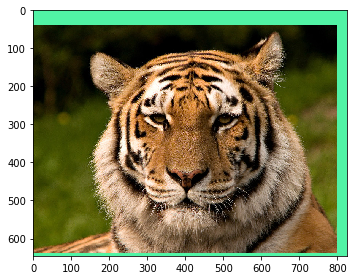

In [7]:
img = imread('https://stepik.org/media/attachments/lesson/58180/tiger-border.png')
imshow(img)
plt.show()


In [8]:
x1, x2, x3 = np.where(img != img[0,0])
a = x1[0]
b = x2[0]
c = img.shape[1]-1-x2[-1]
d = img.shape[0]-1-x1[-1]

print(b, a, c, d)



1 39 25 7


#### 2.2 Арифметические операции. Каналы. Вычисление яркости изображения

#### 2.2.1 Вычисление негатива изображения

#### Прочитайте изображение из файла img.png. У этого изображения нечетное количество строк и столбцов. Вычислите негатив изображения и сохраните его в файл out_img.png.

In [9]:
img_1 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img_2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-negative.png')
np.array_equal(255-img_1, img_2)

True

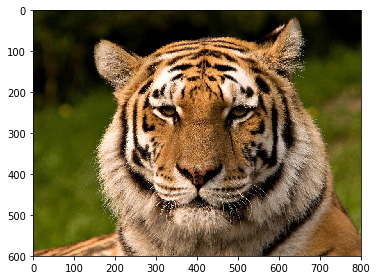

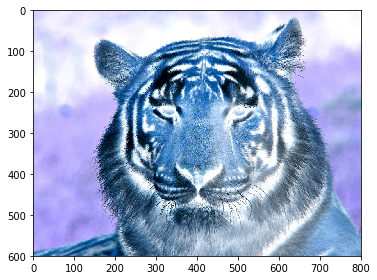

In [10]:
imshow(img_1)
plt.show()
imshow(img_2)
plt.show()

#### 2.2.2 Поменять местами каналы изображения

#### Загрузите изображение из файла img.png. У этого изображения поменяйте местами каналы так, чтобы вместо порядка RGB каналы шли в порядке BRG. Сохраните изображение с измененными каналами в файл out_img.png.


In [11]:
img_1 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img_2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-brg.png')
r = img_1[:,:, 0]
g = img_1[:,:, 1]
b = img_1[:,:, 2]

created_image = np.dstack((b,r,g))
np.array_equal(created_image, img_2)

True

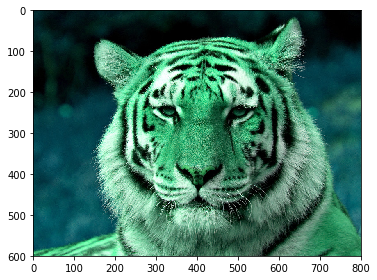

In [12]:
imshow(created_image)
plt.show()

#### 2.2.3 Подсчет яркости изображения
#### Подсчитайте яркость этого изображения и сохраните в файл out_img.png. Результирующее изображение должно быть одноканальным. Для подсчета яркости используйте формулу Y=0.2126⋅R+0.7152⋅G+0.0722⋅B, не забудьте сначала перевести изображение в вещественные числа (функция img_as_float), а затем в целые числа (функция img_as_ubyte).

In [13]:
img_1 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
img_2 = imread('https://stepik.org/media/attachments/lesson/58181/tiger-y.png')

img_1 = img_as_float(img_1)
img_1 = 0.2126 * img_1[:,:,0] + 0.7152 * img_1[:,:,1] + 0.0722 * img_1[:,:,2]
img_1 = img_as_ubyte(img_1)

np.array_equal(img_1, img_2)

C:\Users\DSycheva\Anacondaa\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


True

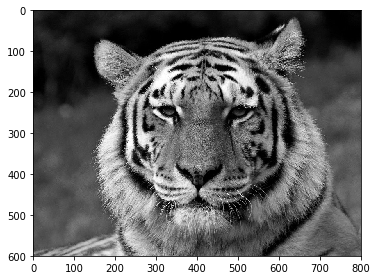

In [14]:
imshow(img_1)
plt.show()

#### 2.3 Сопоставление фотографий Прокудина-Горского
#### 2.3.1 Сопоставление фотографий Прокудина-Горского

#### Напишите функцию align, которая сопоставляет изображения с фотографий Прокудина-Горского и возвращает координаты точек на синем и красном каналах, как это описано в видео, слайдах и описании задания.

In [18]:
def align(img, g_coord):
    gor_g, vert_g = g_coord

    img_f = img_as_float(img)
        
    #деление пленки на три канала b g r
    height, width = img.shape
    height = img_f.shape[0]//3
    
    B = img_f[0 : height, 0 : width]
    G = img_f[height : height * 2, 0 : width]
    R = img_f[height * 2 : height * 3, 0 : width]
    
    img_f = np.dstack((R, G, B))
    
    #обрезка 
    pix = 30 
    row, col, _ = img_f.shape
    img_f = img_f[pix : row - pix, pix : col - pix]
    
    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]
    
    #синий относительно зеленого
    rows, columns = shift(B, G)
    #print("blue:")
    #print("shift rows: ", rows, "shift columns: ", columns)
    
    #Смещение координат зеленой точки по синему каналу
    row_b = gor_g - rows - height #(высота канала)
    col_b = vert_g - columns 
    
    B_shifted = np.roll(B, rows, axis = 0)
    B_shifted = np.roll(B_shifted, columns, axis = 1)
    
    #красный относительно зеленого
    rows, columns = shift(R, G)
    #print("red:")
    #print("shift rows: ", rows, " columns: ", columns)
    
    row_r = gor_g - rows + height
    col_r = vert_g - columns

    R_shifted = np.roll(R, rows, axis = 0)
    R_shifted = np.roll(R_shifted, columns, axis = 1)
    
    imshow(np.dstack((R_shifted, G, B_shifted)))

    return (row_b, col_b), (row_r, col_r)

def shift(img_s, img_b):
 
    shift = {} #хранение сдвига и корреляции

    for row in range(-15, 16): #30
        img_shift = np.roll(img_s, row, axis = 0) # rows

        for col in range(-15, 16):
            img_shift2 = np.roll(img_shift, col, axis = 1) # columns
            shift[row, col] = (img_shift2 * img_b).sum() # correlation
    r, c = max(shift, key=shift.get)
    return r, c

In [19]:
strn = []
for i in range(10):
    strn.append('https://stepik.org/media/attachments/lesson/58182/0' + str(i) + ".png")

((153, 236), (857, 238))

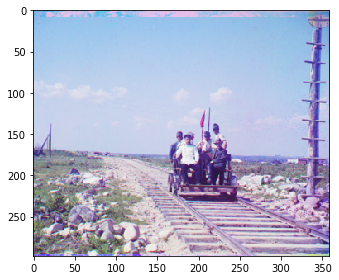

In [23]:
img = imread(strn[0])
align(img, (508, 237))

((170, 237), (841, 236))

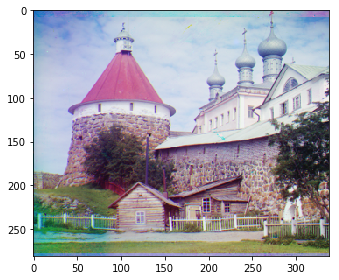

In [24]:
img = imread(strn[1])
align(img, (508, 237)) # random nums

((155, 239), (859, 236))

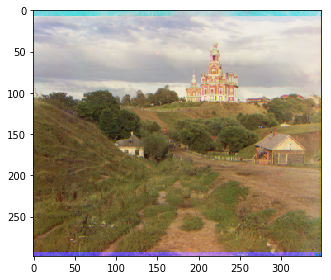

In [25]:
img = imread(strn[2])
align(img, (508, 237))

((124, 237), (891, 234))

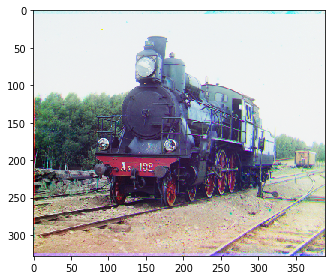

In [26]:
img = imread(strn[3])
align(img, (508, 237))

((122, 238), (889, 236))

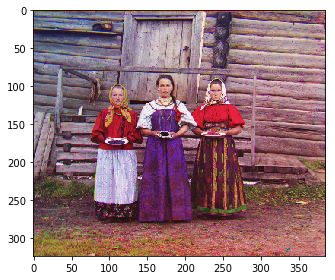

In [27]:
img = imread(strn[4])
align(img, (508, 237))

((125, 239), (889, 235))

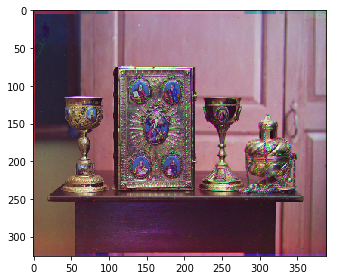

In [28]:
img = imread(strn[5])
align(img, (508, 237))

((125, 240), (889, 234))

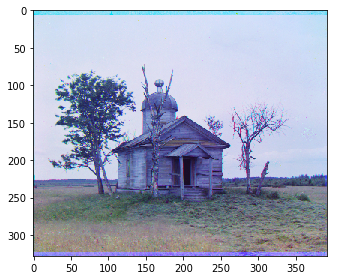

In [29]:
img = imread(strn[6])
align(img, (508, 237))

((161, 237), (854, 238))

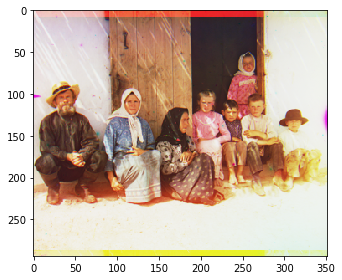

In [30]:
img = imread(strn[7])
align(img, (508, 237))

((129, 242), (886, 234))

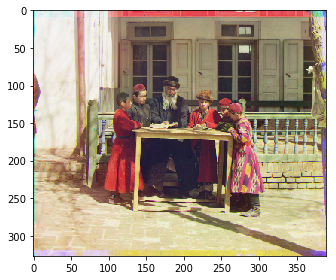

In [31]:
img = imread(strn[8])
align(img, (508, 237))

((129, 240), (886, 235))

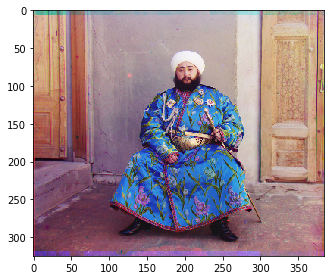

In [32]:
img = imread(strn[9])
align(img, (508, 237))